In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(6,8)})

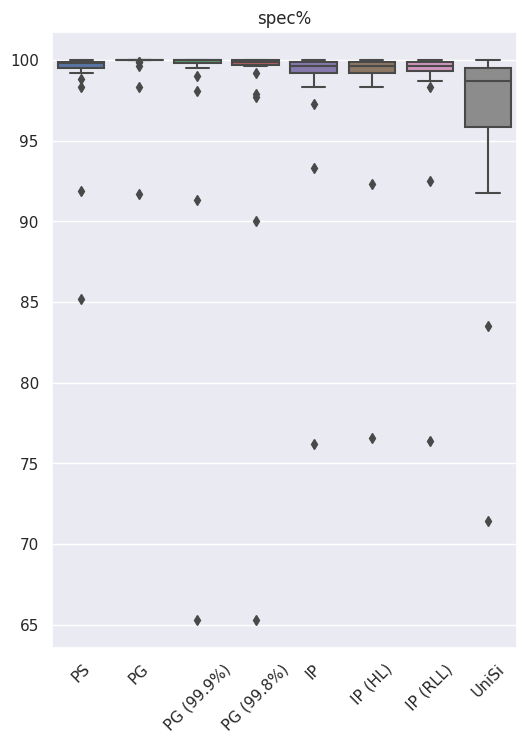

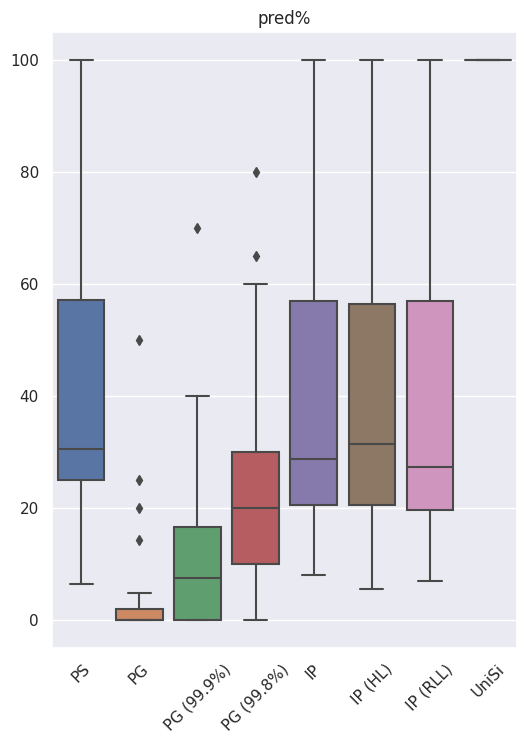

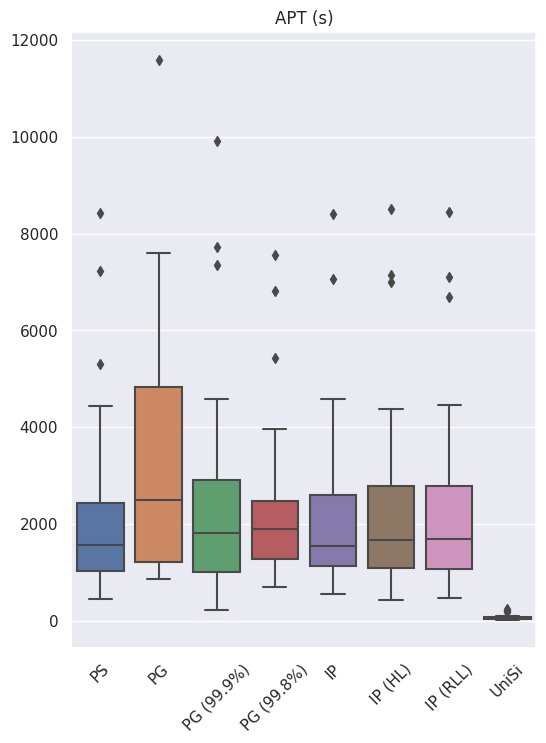

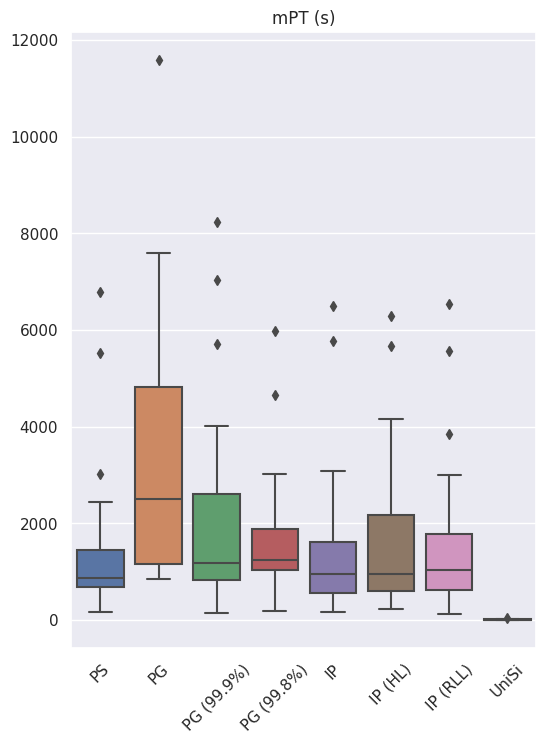

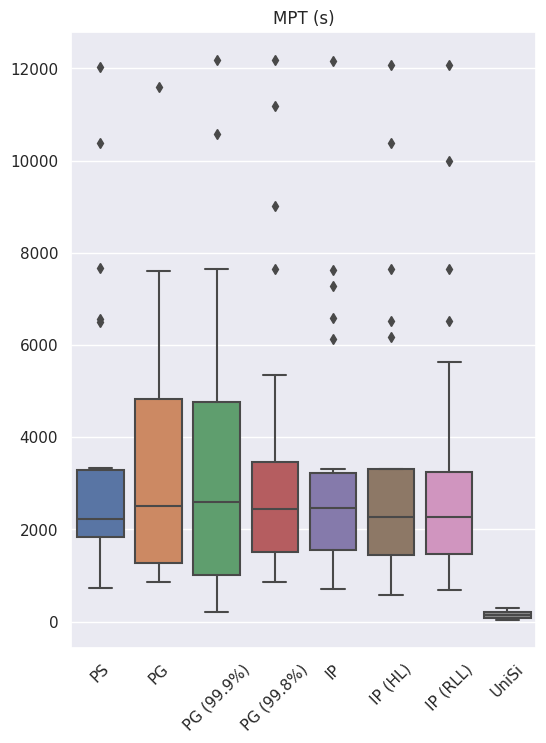

In [3]:
results_dir = "/media/marco741/Archive/Datasets/final"

path_to_csvs = {"PS": "patientspecific/100.0_metrics.csv",
                "PG": "patientgeneric/100.0_metrics.csv",
                "PG (99.9%)": "patientgeneric/99.9_metrics.csv",
                "PG (99.8%)": "patientgeneric/99.8_metrics.csv",
                "IP": "full_interpatient/100.0_metrics.csv",
                "IP (HL)": "interpatient/100.0_metrics.csv",
                "IP (RLL)": "resetoutput_interpatient/100.0_metrics.csv",
                "UniSi": "UniSi.csv"
}

metric_names = ["spec%", "pred%", "APT (s)", "mPT (s)", "MPT (s)"]

df = {k: pd.DataFrame(columns=list(path_to_csvs.keys())) for k in metric_names}

for metric in metric_names:
    for col, path in path_to_csvs.items():
        df[metric][col] = pd.read_csv(Path(results_dir)/path)[metric]
        df[metric][col].drop(df[metric][col].tail(1).index, inplace=True)

# sns.boxplot(data=df["spec%"])
for metric in metric_names:
    plt.figure()
    sns.boxplot(data=df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.savefig(f"boxplot_{metric}.png", bbox_inches="tight")


